## Preparação do ambiente

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
files.upload()

Saving car_price.csv to car_price.csv
Saving kc_house_data.csv to kc_house_data.csv


{'car_price.csv': b'Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity\r\nHonda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0\r\nMaruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0\r\nHyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0\r\nToyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0\r\nToyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 b

In [3]:
df_house = pd.read_csv('/content/kc_house_data.csv')
df_car = pd.read_csv('/content/car_price.csv')

## Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:


### 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [4]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [6]:
df_house['zipcode'] = df_house['zipcode'].astype(str)

In [7]:
df_house_num = df_house.select_dtypes(include=['int64', 'float64'])

In [8]:
corr_house = df_house_num.corr()

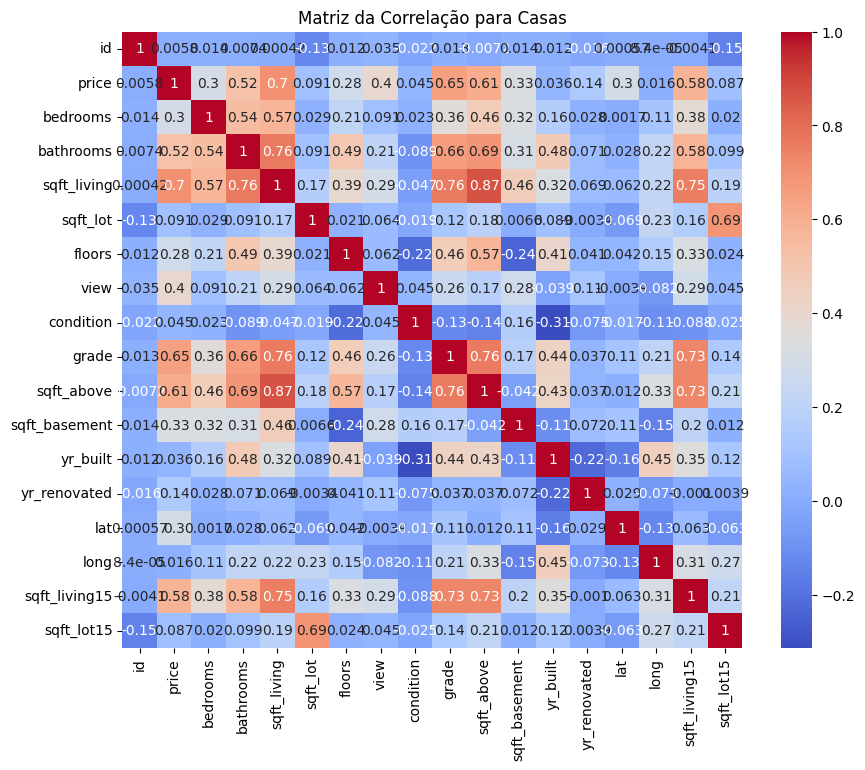

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_house, annot=True, cmap='coolwarm')
plt.title('Matriz da Correlação para Casas')
plt.show()

In [10]:
# buscando a correlação entre preço e número de quartos
corr_price_bedrooms = df_house['price'].corr(df_house['bedrooms'])
corr_price_bedrooms

0.29920721616918206

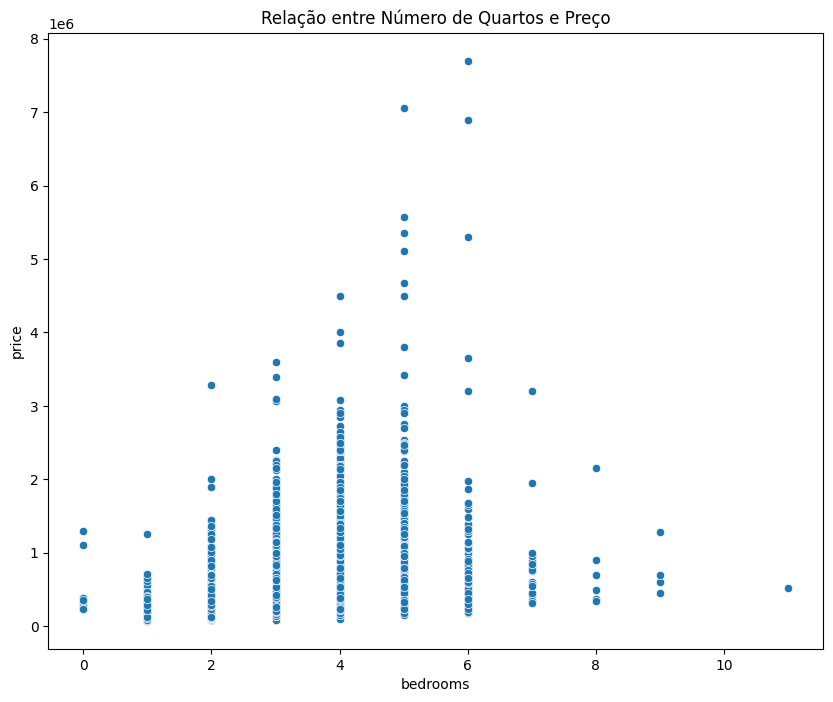

In [11]:
# plotando no grafico a relação
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_house, x='bedrooms', y='price')
plt.title('Relação entre Número de Quartos e Preço')
plt.show()

A relação entre preço e número de quartos é despersa.

In [12]:
# separando casas com 2000 pés quadrados
df_house_2000 = df_house[df_house['sqft_living'] >= 2000]

In [13]:
df_house_2000_num = df_house_2000.select_dtypes(include=['int64', 'float64'])
corr_house_2000 = df_house_2000_num.corr()

Text(0.5, 1.0, 'Matriz da Correlação para Casas com Área Superior a 2000 pés quadrados')

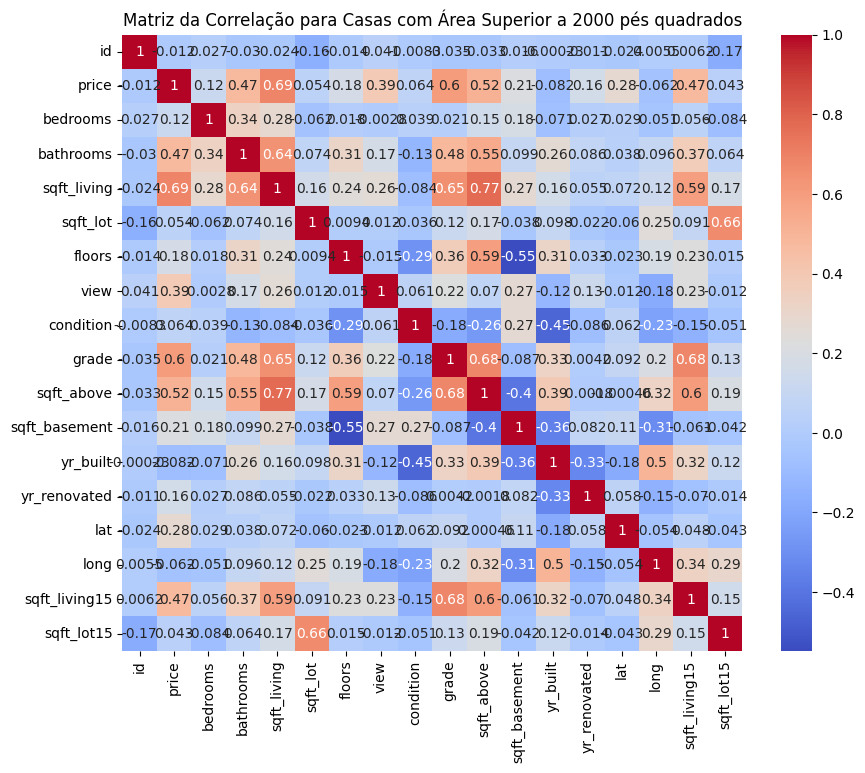

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_house_2000, annot=True, cmap='coolwarm')
plt.title('Matriz da Correlação para Casas com Área Superior a 2000 pés quadrados')

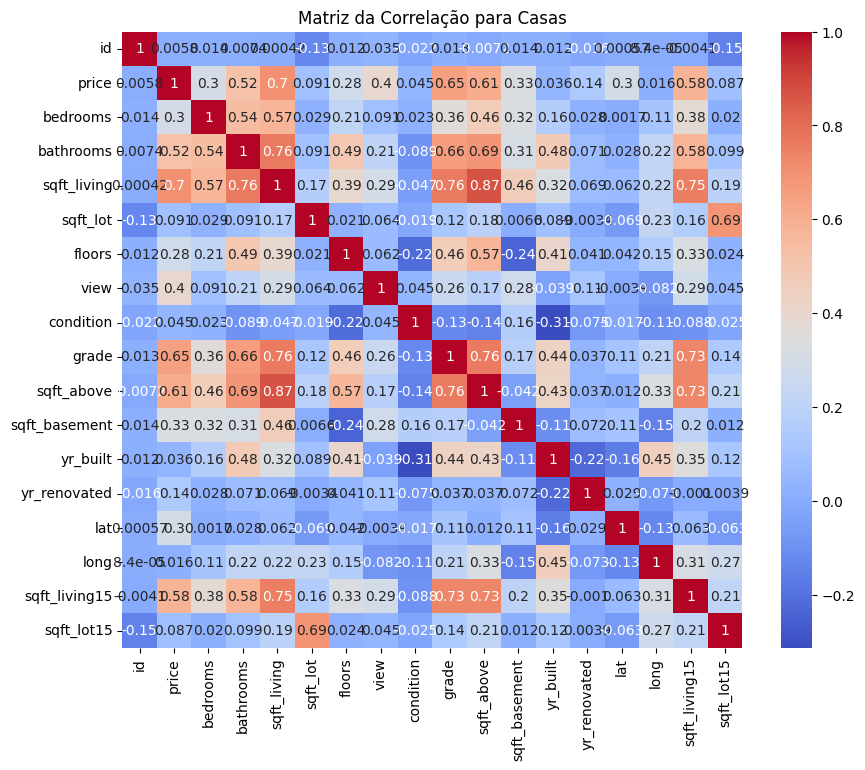

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_house, annot=True, cmap='coolwarm')
plt.title('Matriz da Correlação para Casas')
plt.show()

Sim, existe diferença quando consideramos apenas casa com área total superior a 2000 pés quadrados.

### 2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [16]:
# separando df de casas com pelo menos dois banheiros
df_house_2_bath = df_house[df_house['bathrooms'] >= 2]

In [17]:
df_house_2_bath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5790 entries, 1 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5790 non-null   int64  
 1   date           5790 non-null   object 
 2   price          5790 non-null   float64
 3   bedrooms       5790 non-null   int64  
 4   bathrooms      5790 non-null   float64
 5   sqft_living    5790 non-null   int64  
 6   sqft_lot       5790 non-null   int64  
 7   floors         5790 non-null   float64
 8   waterfront     5790 non-null   object 
 9   view           5790 non-null   int64  
 10  condition      5790 non-null   int64  
 11  grade          5790 non-null   int64  
 12  sqft_above     5790 non-null   int64  
 13  sqft_basement  5790 non-null   int64  
 14  yr_built       5790 non-null   int64  
 15  yr_renovated   5790 non-null   int64  
 16  zipcode        5790 non-null   object 
 17  lat            5790 non-null   float64
 18  long         

In [18]:
# correlação entre preço e área total da casa
corr_price_sqft_living = df_house_2_bath['price'].corr(df_house_2_bath['sqft_living'])
corr_price_sqft_living

0.7067107107996193

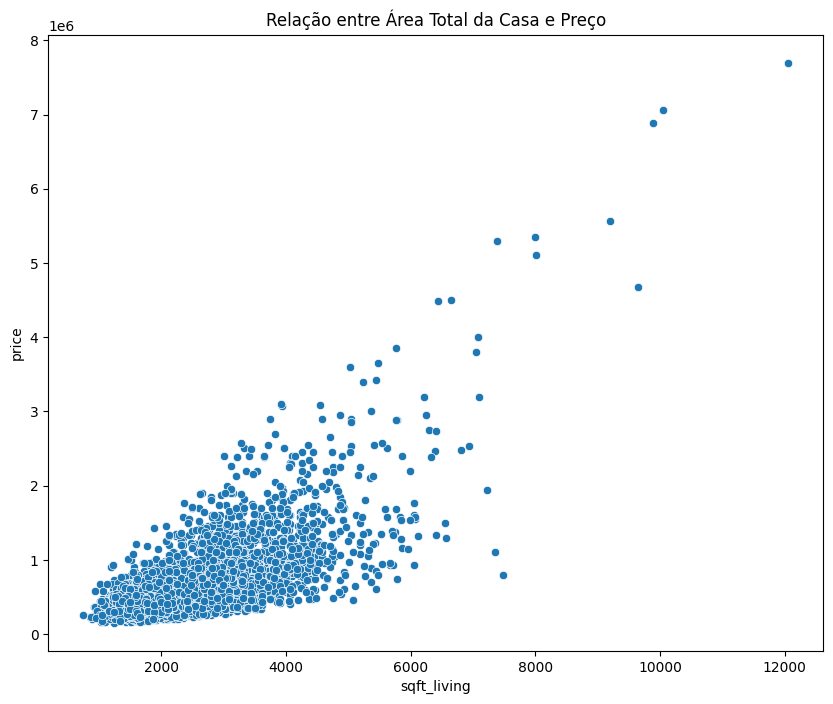

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_house_2_bath, x='sqft_living', y='price')
plt.title('Relação entre Área Total da Casa e Preço')
plt.show()

(ir na aula, tem um nome específico quando o grafico tem esse comportamento)

### 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?


In [20]:
df_house['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 4.25, 3.75, 5.  , 0.  , 1.25, 0.5 , 5.5 , 5.25,
       6.75, 6.  , 5.75, 8.  , 7.5 , 7.75])

In [21]:
def corr_qtd_banheiros(df, n_bath):
  df_bath_n = df_house[df_house['bathrooms'] >= n_bath]
  corr_price_sqft_living_bath_n = df_bath_n['bathrooms'].corr(df_bath_n['sqft_living'])
  return corr_price_sqft_living_bath_n

In [22]:
for n_bath in range(0, int(df_house['bathrooms'].max())):
  print(f'Correlação para {n_bath} banheiros: {corr_qtd_banheiros(df_house, n_bath)}')

Correlação para 0 banheiros: 0.7648101246651208
Correlação para 1 banheiros: 0.765750287953432
Correlação para 2 banheiros: 0.6675195375179866
Correlação para 3 banheiros: 0.6077561885507572
Correlação para 4 banheiros: 0.6058537956236508
Correlação para 5 banheiros: 0.5773429538738348
Correlação para 6 banheiros: 0.5200521484007569
Correlação para 7 banheiros: 0.9664956478637884


### 4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [23]:
# separando para correlação condition e price
df_house_3000 = df_house[df_house['sqft_living'] >= 3000]

corr_condition_price = df_house_3000['condition'].corr(df_house_3000['price'])
corr_condition_price

0.1051501629377982

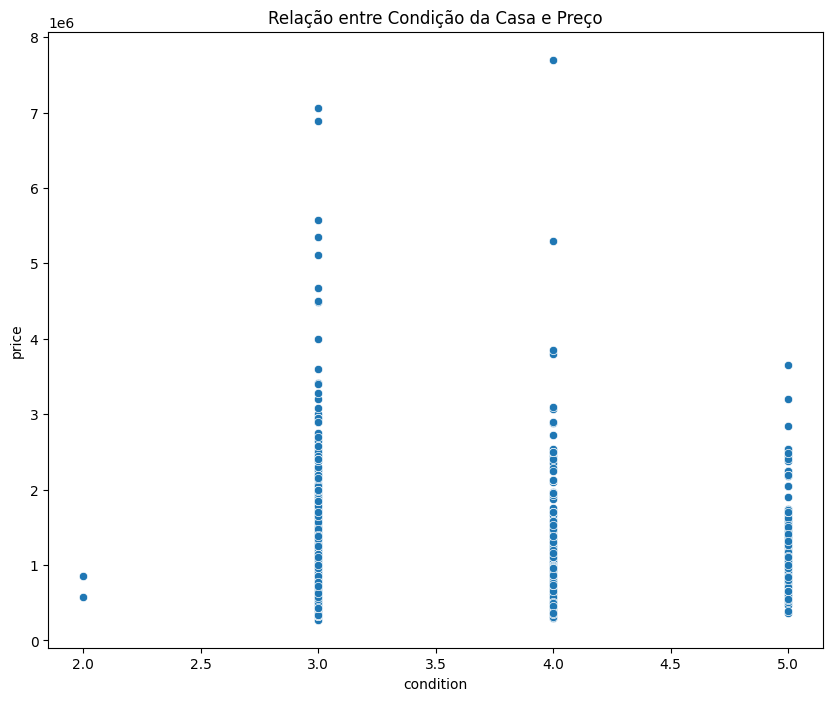

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_house_3000, x='condition', y='price')
plt.title('Relação entre Condição da Casa e Preço')
plt.show()

A correlação entre condição da casa e preço é despersa.

### 5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?


In [25]:
# separando casas com pelo menos 3 quartos
df_house_3_bedrooms = df_house[df_house['bedrooms'] >= 3]

corr_lat_long_price = df_house_3_bedrooms[['lat', 'long', 'price']].corr()
corr_lat_long_price

,lat,long,price
lat,1.000000,-0.122460,0.312555
long,-0.122460,1.000000,-0.007275
price,0.312555,-0.007275,1.000000


### 6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [26]:
# identificando as categorias de waterfront
df_house['waterfront'].unique()

array(['n', 'y'], dtype=object)

In [27]:
# aplicando o teste ANOVA
from statsmodels.formula.api import ols
model = ols('price ~ C(waterfront)', data=df_house).fit()  # C() indica que 'waterfront' é uma variável categórica
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(waterfront),1.250790e+14,1.0,964.573325,2.973808e-202
Residual,1.296339e+15,9997.0,NaN,NaN


## Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

### 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [28]:
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [29]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [30]:
df_car_num = df_car.select_dtypes(include=['int64', 'float64'])

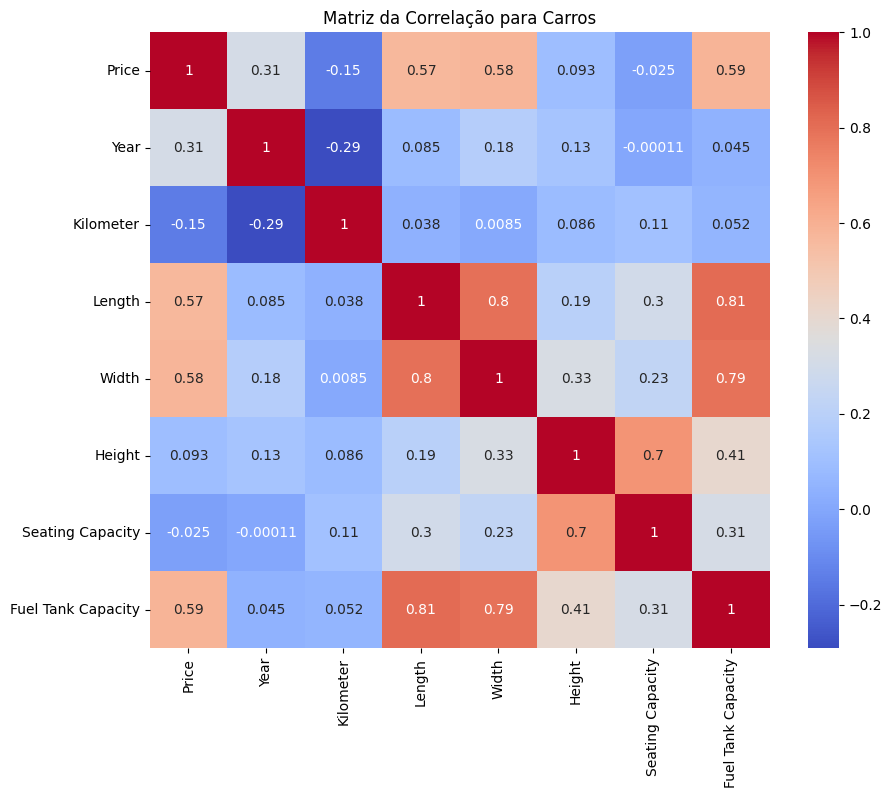

In [31]:
# mostrando a matriz de correlação
corr_car = df_car_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_car, annot=True, cmap='coolwarm')
plt.title('Matriz da Correlação para Carros')
plt.show()

Um exemplo de correlação positiva é Price e Length, negativa Price e Kilometer e neutra seria Price e Height

### 8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price

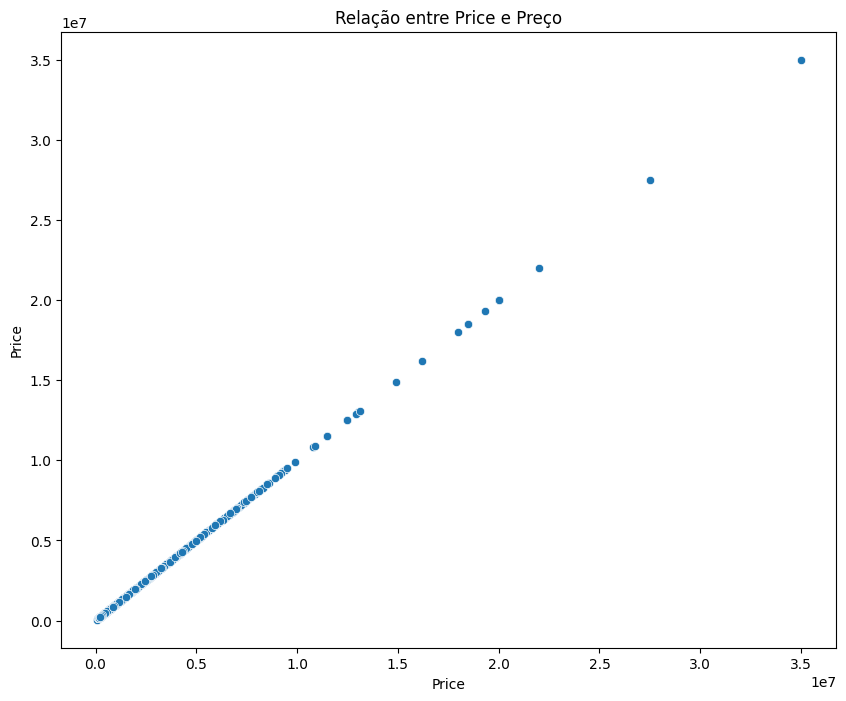

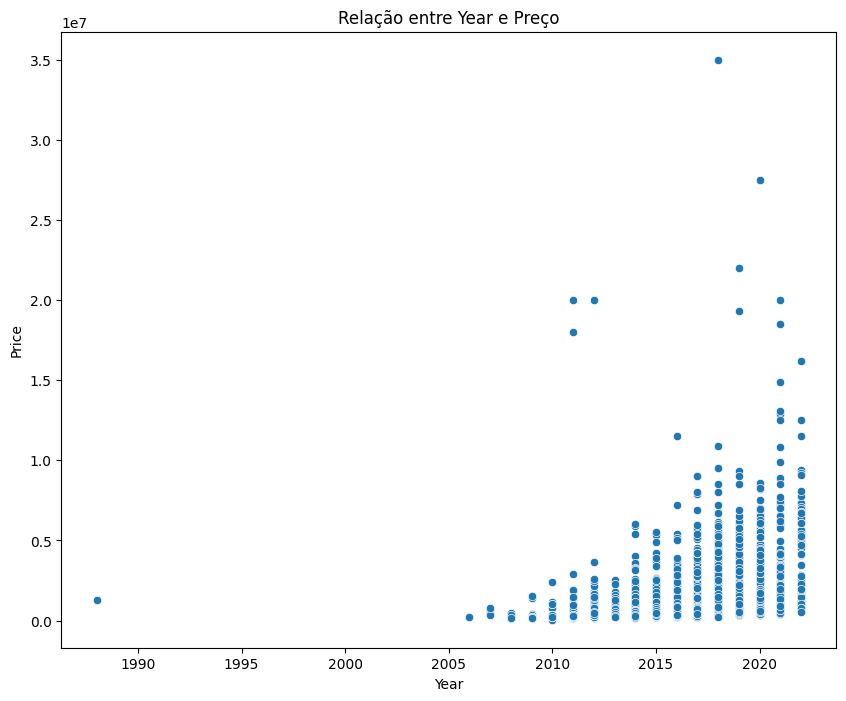

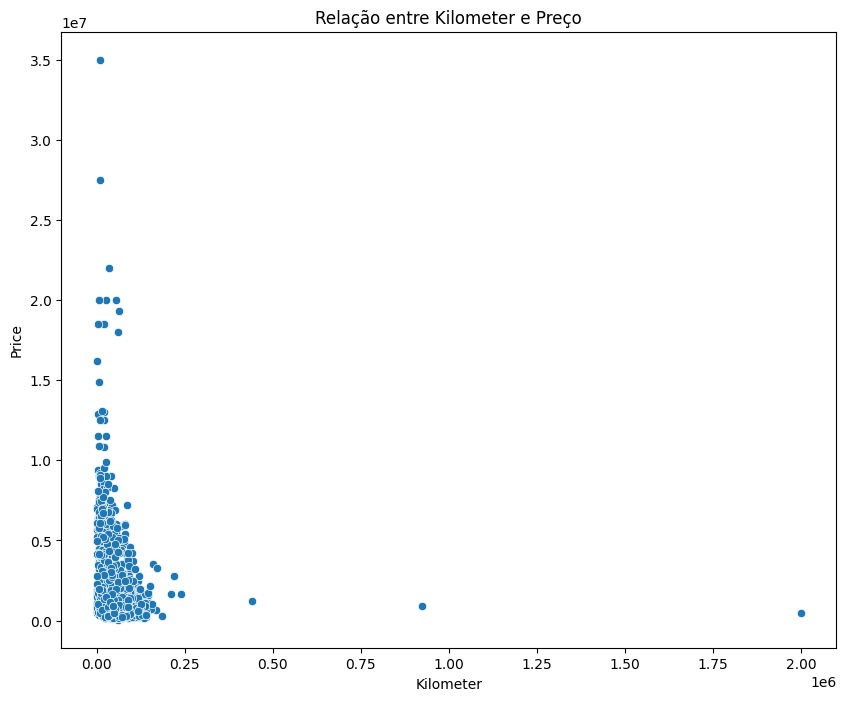

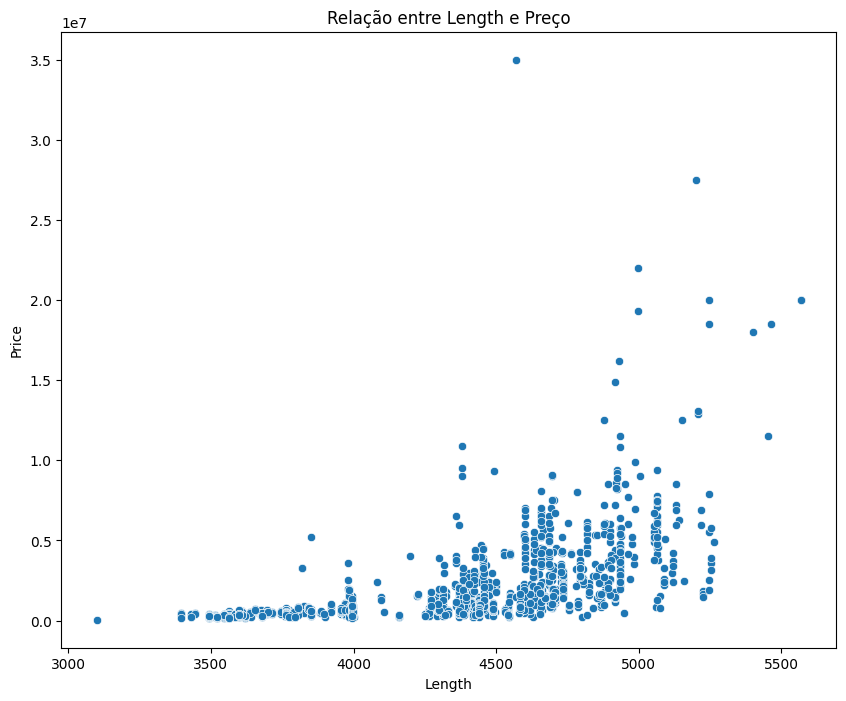

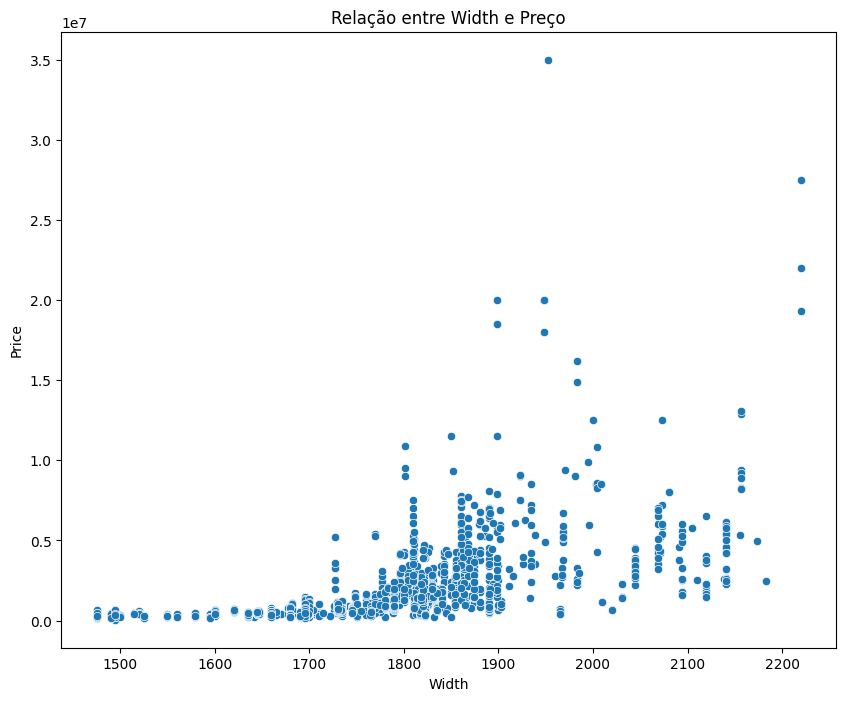

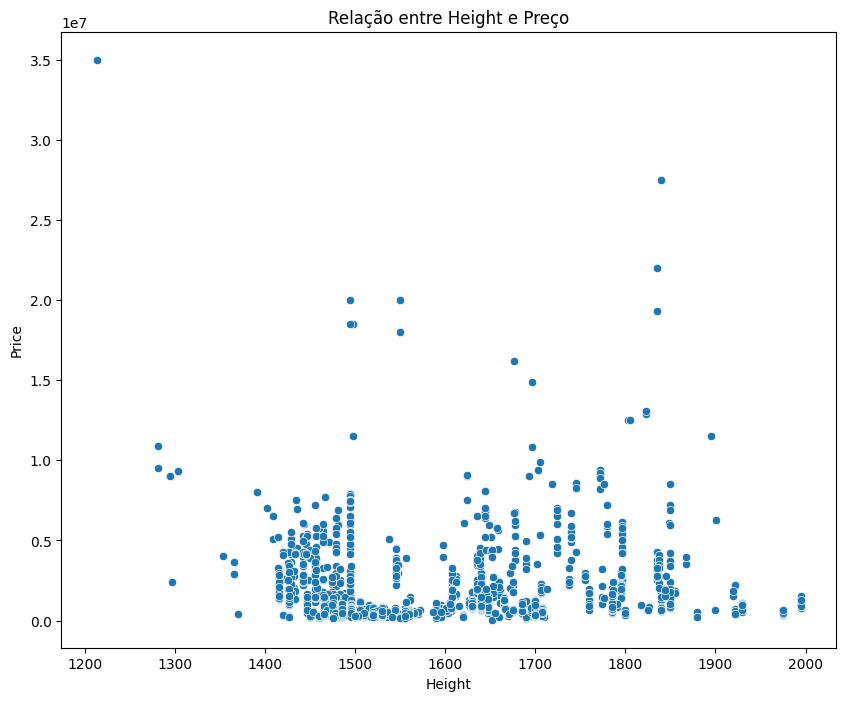

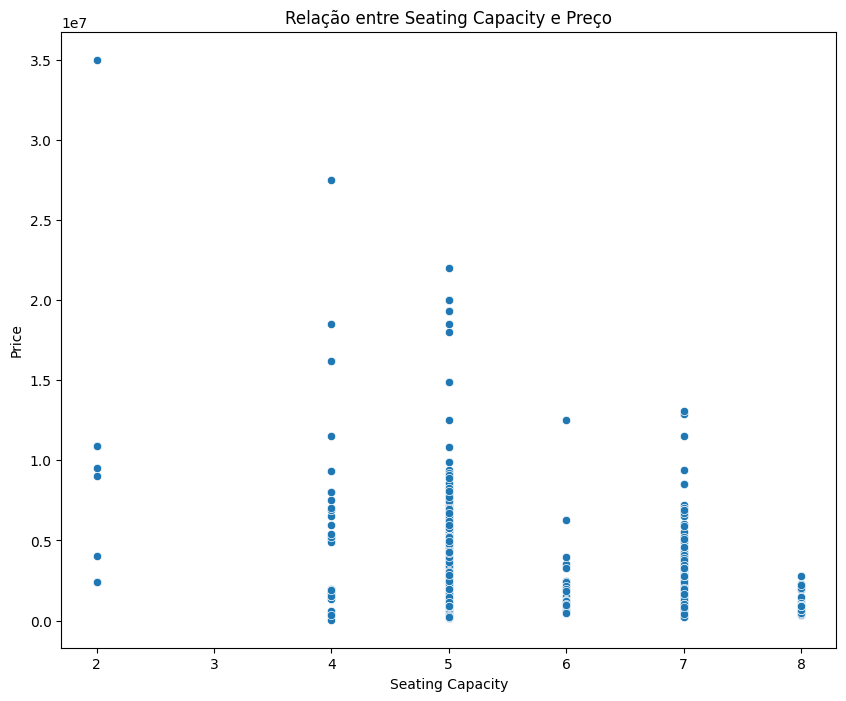

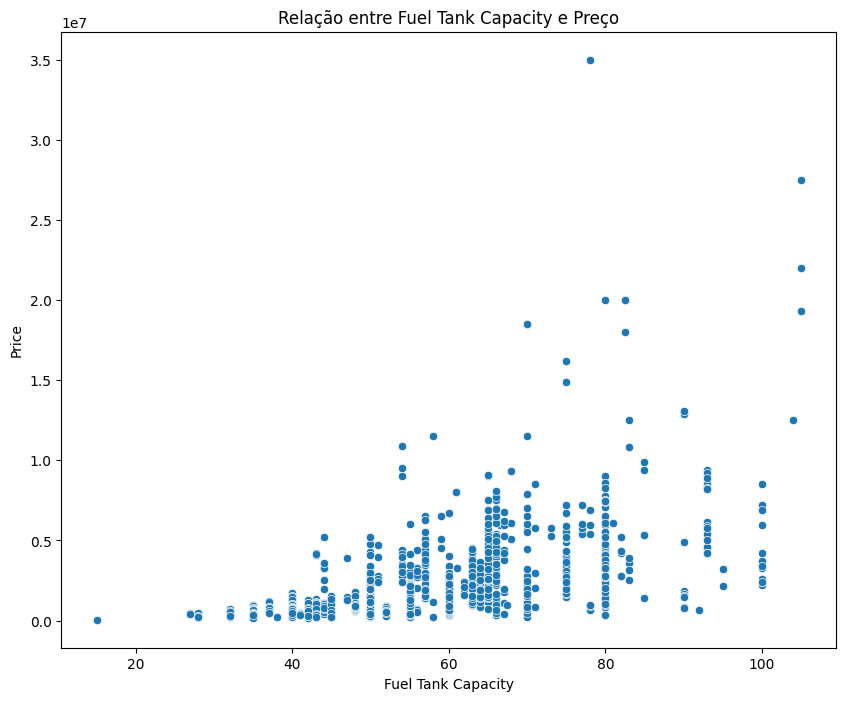

In [32]:
# plotando os graficos em relação ao preço
for coluna in df_car_num.columns:
  plt.figure(figsize=(10, 8))
  sns.scatterplot(data=df_car, x=coluna, y='Price')
  plt.title(f'Relação entre {coluna} e Preço')
  plt.show()

### 9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [33]:
# criando um modelo de regressao linear simples
X = df_car['Width']
Y = df_car['Price']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     934.8
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          7.23e-167
Time:                        22:43:06   Log-Likelihood:                -29830.
No. Observations:                1874   AIC:                         5.966e+04
Df Residuals:                    1872   BIC:                         5.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.713e+07   6.18e+05    -27.710      0.0

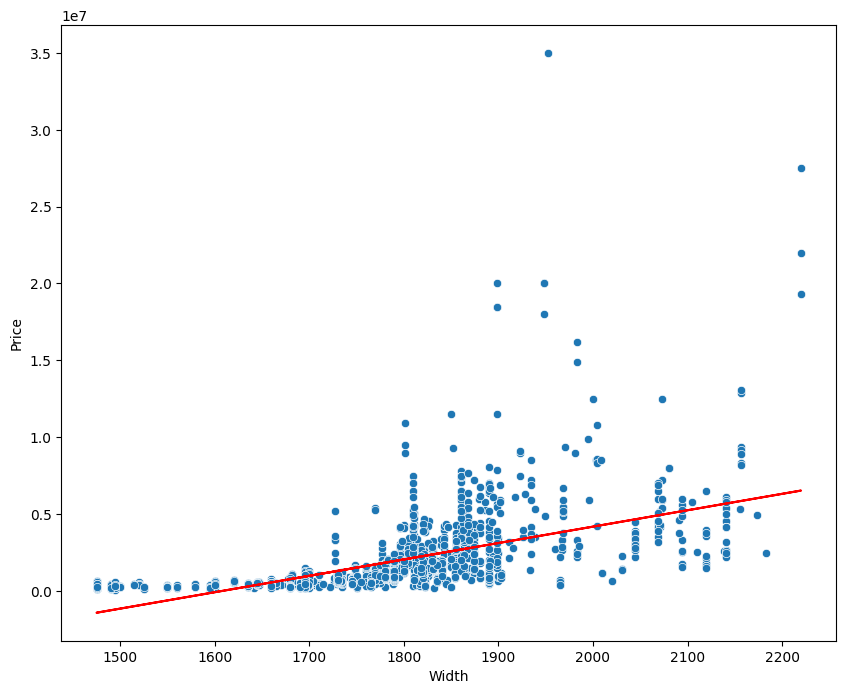

In [34]:
# demonstrando o plot da reta estimada
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_car, x='Width', y='Price')
plt.plot(X['Width'], model.predict(), color='red', label='Reta Estimada')

### 10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.


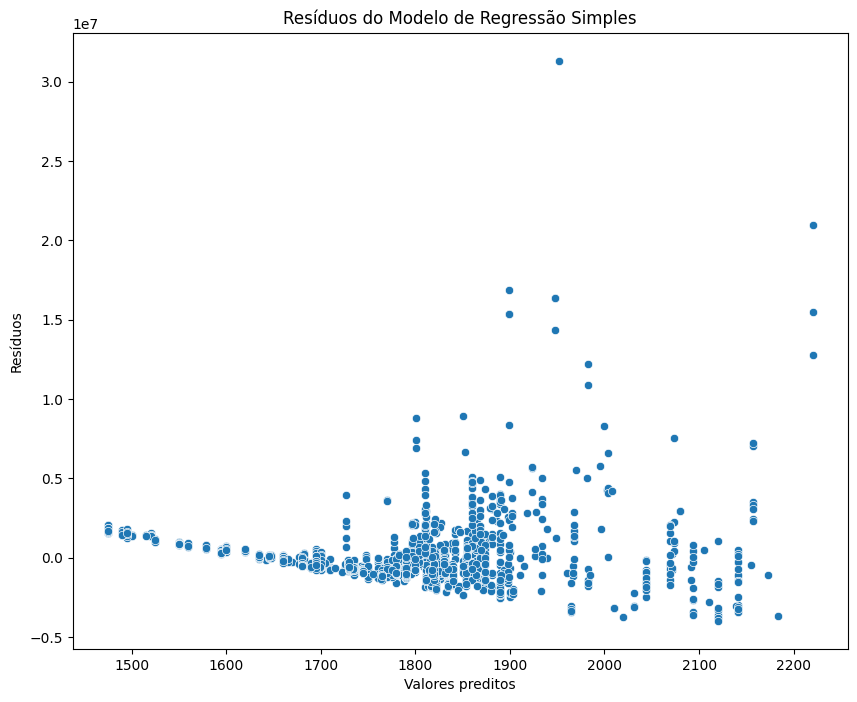

In [35]:
# residuos do modelo de regressão simples
y = model.predict(X)
residuos = Y - y

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['Width'], y=residuos)
plt.title('Resíduos do Modelo de Regressão Simples')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.show()

### 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [36]:
# modelo de regressão multivariada
X = sm.add_constant(df_car_num)
Y = df_car['Price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.310e+27
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:43:07   Log-Likelihood:                 26056.
No. Observations:                1874   AIC:                        -5.209e+04
Df Residuals:                    1865   BIC:                        -5.204e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.713e+07   3.75

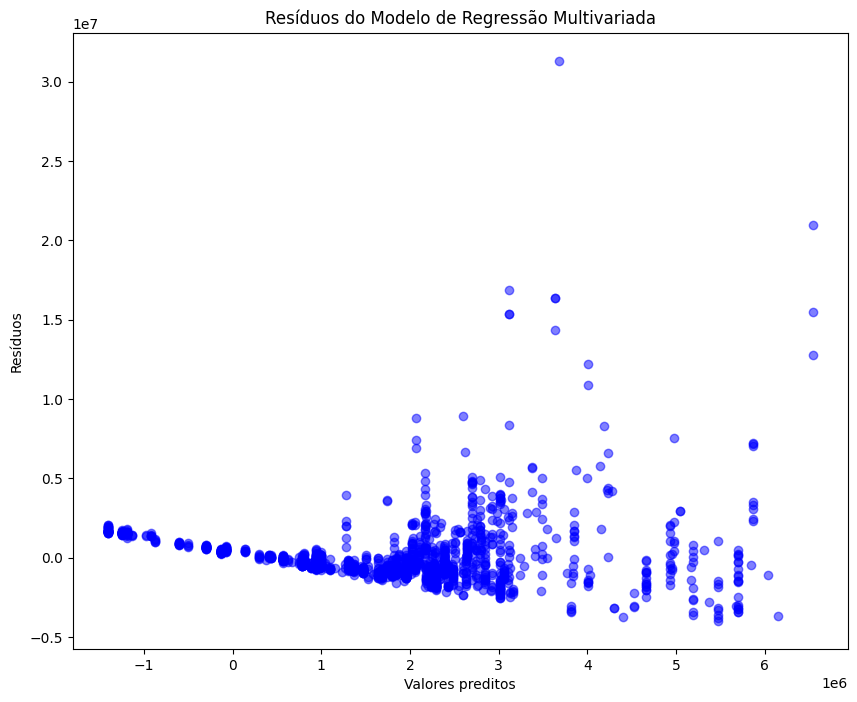

In [37]:
# residuos do modelo de regressão multivariada
y = model.predict(X)
residuals = Y - y

plt.figure(figsize=(10, 8))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.title('Resíduos do Modelo de Regressão Multivariada')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.show()